In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd

# Load your dataset
df = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet2')  # Replace with your file path
df['month'] = pd.to_datetime(df['month'])
df

,month,Arrival(in ton),modal price,temprature,Rain Days,rainfall
0,2010-01-01,18.108688,952.799068,33.333333,2,1.94
1,2010-02-01,19.938417,937.459645,38.333333,0,0.00
2,2010-03-01,24.788689,949.015482,40.555556,3,0.52
3,2010-04-01,24.663240,1008.844008,40.555556,2,44.99
4,2010-05-01,14.229670,1017.568627,38.333333,4,3.66
...,...,...,...,...,...,...
172,2024-05-01,21.294051,2537.236682,25.000000,1,47.08
173,2024-06-01,16.947092,2473.844760,25.000000,20,95.33
174,2024-07-01,13.303412,2480.717893,23.888889,32,53.53
175,2024-08-01,13.501367,2461.471763,23.888889,29,19.02


In [2]:
df.month = pd.to_datetime(df.month)
df = df.set_index("month")
df.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall
month,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94
2010-02-01,19.938417,937.459645,38.333333,0,0.00
2010-03-01,24.788689,949.015482,40.555556,3,0.52
2010-04-01,24.663240,1008.844008,40.555556,2,44.99
2010-05-01,14.229670,1017.568627,38.333333,4,3.66


In [3]:
df.index = pd.to_datetime(df.index)


df['month'] = df.index.month
df['year'] = df.index.year


df.head()  

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,month,year
month,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,1,2010
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2,2010
2010-03-01,24.788689,949.015482,40.555556,3,0.52,3,2010
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,4,2010
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,5,2010


In [4]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'


df['season'] = df['month'].apply(month_to_season)


df = df.drop(columns=['month'])


In [5]:
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_dummies], axis=1)

df.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,year,season,season_Autumn,season_Spring,season_Summer,season_Winter
month,,,,,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,2010,Winter,False,False,False,True
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2010,Winter,False,False,False,True
2010-03-01,24.788689,949.015482,40.555556,3,0.52,2010,Spring,False,True,False,False
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,2010,Spring,False,True,False,False
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,2010,Spring,False,True,False,False


In [6]:
df.columns

Index(['Arrival(in ton)', 'modal price', 'temprature', 'Rain Days', 'rainfall',
       'year', 'season', 'season_Autumn', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [7]:
# Create lagged features for price
df['lagged_modal_price'] = df['modal price'].shift(1)
df['lagged_modal_price'] 

month
2010-01-01            NaN
2010-02-01     952.799068
2010-03-01     937.459645
2010-04-01     949.015482
2010-05-01    1008.844008
                 ...     
2024-05-01    2748.113475
2024-06-01    2537.236682
2024-07-01    2473.844760
2024-08-01    2480.717893
2024-09-01    2461.471763
Name: lagged_modal_price, Length: 177, dtype: float64

In [8]:
df['lagged_arrival'] = df['Arrival(in ton)'].shift(1)
df['lagged_arrival'] 

month
2010-01-01          NaN
2010-02-01    18.108688
2010-03-01    19.938417
2010-04-01    24.788689
2010-05-01    24.663240
                ...    
2024-05-01    27.199963
2024-06-01    21.294051
2024-07-01    16.947092
2024-08-01    13.303412
2024-09-01    13.501367
Name: lagged_arrival, Length: 177, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split 
# Define features (X) and target (y) using the DataFrame columns
X = df[['rainfall', 'Rain Days','lagged_modal_price','temprature','lagged_arrival'] + list(season_dummies.columns)]
y = df['Arrival(in ton)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [25]:
import numpy as np
scaler_y = MinMaxScaler()
# Reshape y to 2D for scaling (if it's a 1D NumPy array)
y = scaler_y.fit_transform(y.reshape(-1, 1))


In [27]:
# Reshape X directly if it's a NumPy array
X = X.reshape((X.shape[0], X.shape[1], 1))


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for a single target variable
])

C:\Users\sdkag\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])



In [32]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - loss: 0.0909 - mae: 0.2446 - val_loss: 0.0486 - val_mae: 0.1620
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0583 - mae: 0.1694 - val_loss: 0.0244 - val_mae: 0.1065
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0359 - mae: 0.1407 - val_loss: 0.0297 - val_mae: 0.1479
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0399 - mae: 0.1667 - val_loss: 0.0273 - val_mae: 0.1396
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0407 - mae: 0.1627 - val_loss: 0.0225 - val_mae: 0.1141
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0369 - mae: 0.1451 - val_loss: 0.0244 - val_mae: 0.1056
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0308 - mae: 0.1218 - val_loss: 0.0243 - val_mae: 0.1047
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0418 - mae: 0.1364 - val_loss: 0.0225 - val_mae: 0.1080
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0325 - mae: 0.1314 -

In [33]:
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


In [45]:
y_pred_original

array([[0.32035384],
       [0.15033561],
       [0.18581027],
       [0.16541183],
       [0.28545097],
       [0.10821167],
       [0.3912082 ],
       [0.48141706],
       [0.2606753 ],
       [0.29556495],
       [0.23397812],
       [0.33760738],
       [0.27337086],
       [0.25814912],
       [0.29055902],
       [0.11158022],
       [0.22613284],
       [0.32497787],
       [0.12587658],
       [0.23387897],
       [0.3111583 ],
       [0.21412203],
       [0.3281355 ],
       [0.32378533],
       [0.13667186],
       [0.18439382],
       [0.29549298],
       [0.13899891],
       [0.32441407],
       [0.24097258],
       [0.15184736],
       [0.22454295],
       [0.26665786]], dtype=float32)

In [38]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming y_test contains the true values and y_pred contains the predicted values
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print(f'MAPE: {mape * 100:.2f}%')


MAPE: 50.27%


In [42]:
y_train_pred = model.predict(X_train)
y_train_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.29558322],
       [0.32150957],
       [0.29265118],
       [0.12495442],
       [0.18756354],
       [0.220999  ],
       [0.12114189],
       [0.23396802],
       [0.14353487],
       [0.19818524],
       [0.28654018],
       [0.2846759 ],
       [0.3283387 ],
       [0.27854508],
       [0.34736416],
       [0.250708  ],
       [0.23917562],
       [0.31612587],
       [0.32768098],
       [0.2945362 ],
       [0.3580002 ],
       [0.22847211],
       [0.1758534 ],
       [0.2656018 ],
       [0.16062096],
       [0.36501607],
       [0.25918618],
       [0.23140699],
       [0.19165847],
       [0.18358189],
       [0.22899953],
       [0.31157827],
       [0.22220519],
       [0.34900084],
       [0.29700553],
       [0.24885052],
       [0.27605978],
       [0.39310542],
       [0.435322  ],
       [0.33043268],
       [0.1193627 ],
       [0.38875702],
       [0.1261158 ],
       [0.32556942],
       [0.16392902],
       [0.27313176],
       [0.31918004],
       [0.244

In [44]:
y_train_pred_original = scaler_y.inverse_transform(y_train_pred)
y_train_pred_original



array([[0.29558322],
       [0.32150957],
       [0.29265118],
       [0.12495442],
       [0.18756354],
       [0.220999  ],
       [0.12114189],
       [0.23396802],
       [0.14353487],
       [0.19818524],
       [0.28654018],
       [0.2846759 ],
       [0.3283387 ],
       [0.27854508],
       [0.34736416],
       [0.250708  ],
       [0.23917562],
       [0.31612587],
       [0.32768098],
       [0.2945362 ],
       [0.3580002 ],
       [0.22847211],
       [0.1758534 ],
       [0.2656018 ],
       [0.16062096],
       [0.36501607],
       [0.25918618],
       [0.23140699],
       [0.19165847],
       [0.18358189],
       [0.22899953],
       [0.31157827],
       [0.22220519],
       [0.34900084],
       [0.29700553],
       [0.24885052],
       [0.27605978],
       [0.39310542],
       [0.435322  ],
       [0.33043268],
       [0.1193627 ],
       [0.38875702],
       [0.1261158 ],
       [0.32556942],
       [0.16392902],
       [0.27313176],
       [0.31918004],
       [0.244

In [41]:
mape = mean_absolute_percentage_error(y_train_original, y_train_pred_original)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 1069268204774259.75%


In [34]:
print("First 5 Predicted Arrivals:", y_pred_original[:5].flatten())
print("First 5 Actual Arrivals:", y_test_original[:5].flatten())


First 5 Predicted Arrivals: [0.32035384 0.15033561 0.18581027 0.16541183 0.28545097]
First 5 Actual Arrivals: [0.65891778 0.20924272 0.34120266 0.22637019 0.20233194]


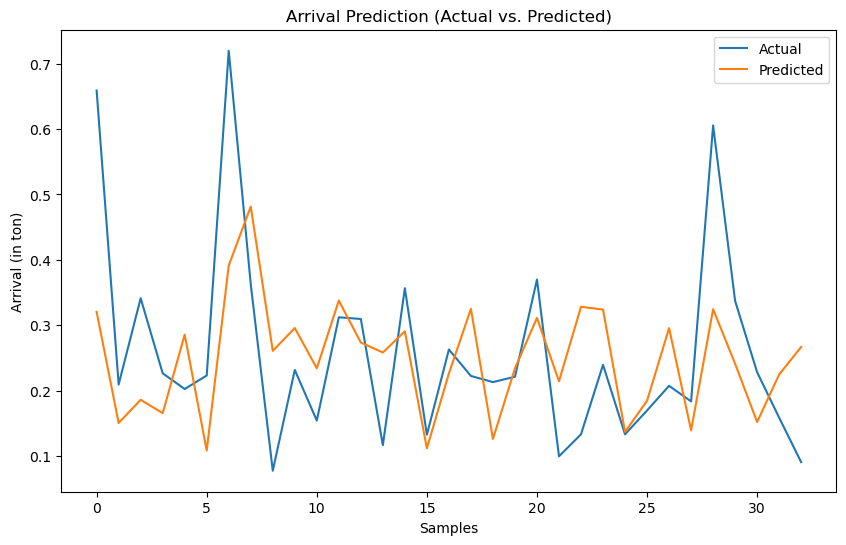

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_original[:50], label="Actual")
plt.plot(y_pred_original[:50], label="Predicted")
plt.title("Arrival Prediction (Actual vs. Predicted)")
plt.xlabel("Samples")
plt.ylabel("Arrival (in ton)")
plt.legend()
plt.show()

In [37]:
import numpy as np

# Number of time steps used in your training
time_steps = 12  

# Get the last 'time_steps' data points for forecasting
last_sequence = X_test[-time_steps:].reshape(1, time_steps, X_test.shape[1])  # Reshape for LSTM input

# Forecast the next value
forecast = model.predict(last_sequence)

# Inverse transform the forecast (if MinMaxScaler was used)
forecast_original_scale = scaler_y.inverse_transform(forecast)

print("Forecasted Value:", forecast_original_scale[0][0])


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/lstm_2_1/while/body/_1/sequential_1_1/lstm_2_1/while/lstm_cell_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [1,12], In[1]: [1,256]
	 [[{{node sequential_1_1/lstm_2_1/while/body/_1/sequential_1_1/lstm_2_1/while/lstm_cell_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_10156]